# Importamos librerías y cargamos la base de datos para comenzar a analizar

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
data   = pd.read_csv('./data/properati-fase2.csv', sep = ",", low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82627 entries, 0 to 82626
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo_Propiedad         82627 non-null  object 
 1   Barrio                 82627 non-null  object 
 2   Región                 82627 non-null  object 
 3   lat-lon                48977 non-null  object 
 4   lat                    48977 non-null  float64
 5   lon                    48977 non-null  float64
 6   Precio                 82627 non-null  float64
 7   surface_total_in_m2    82627 non-null  float64
 8   surface_covered_in_m2  82627 non-null  float64
 9   Descripción            82626 non-null  object 
 10  Título                 82627 non-null  object 
 11  Precio_por_m2          82627 non-null  float64
 12  Garage                 82627 non-null  int64  
 13  Estado                 82627 non-null  int64  
 14  Pileta                 82627 non-null  int64  
 15  Ba

In [4]:
data_caba_mask = data.Región == "Capital Federal"
data_caba = data[data_caba_mask]
data_caba.Barrio.value_counts().head(20)

Belgrano             2057
Caballito            1937
Palermo              1896
Villa Urquiza        1261
Flores               1165
Recoleta             1123
Villa Crespo         1079
San Telmo            1059
Almagro               902
Barrio Norte          836
Capital Federal       810
Balvanera             592
Nuñez                 577
Saavedra              476
Monserrat             466
Floresta              408
Villa del Parque      396
Boedo                 394
Barracas              373
Palermo Hollywood     356
Name: Barrio, dtype: int64

In [5]:
location_delitos = "./data/barrios_CABA_descr.csv"
data_delitos = pd.read_csv(location_delitos, low_memory = False)
data_delitos

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,1038983,13-09-19,14,Robo (con violencia),NaN,NaN,6.0,Caballito,-34.609876,-58.456159
1,1038986,13-09-19,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609394,-58.395934
2,1038989,13-09-19,13,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609231,-58.411177
3,1038990,13-09-19,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609095,-58.405899
4,1038991,13-09-19,11,Robo (con violencia),NaN,NaN,1.0,Monserrat,-34.609073,-58.380570
...,...,...,...,...,...,...,...,...,...,...
122479,1038888,13-09-19,21,Robo (con violencia),NaN,NaN,10.0,Vélez Sársfield,-34.631202,-58.500760
122480,1038920,13-09-19,20,Robo (con violencia),NaN,NaN,10.0,Vélez Sársfield,-34.624261,-58.495508
122481,1038975,13-09-19,18,Robo (con violencia),NaN,NaN,5.0,Almagro,-34.611807,-58.421817
122482,1038977,13-09-19,19,Robo (con violencia),NaN,NaN,11.0,Villa Santa Rita,-34.611037,-58.483334


In [6]:
#Tenemos 62 Barrios en CABA según el DF Nuestro
barrios_caba = data_caba.Barrio.unique()
barrios_caba.shape

(62,)

In [7]:
#Son 49 los barrios realmente
barrios_delitos = data_delitos.barrio.unique()
print(barrios_delitos.shape)
print(barrios_delitos)

(49,)
['Caballito' 'Balvanera' 'Monserrat' 'Villa Gral. Mitre' 'Villa Crespo'
 'Villa Devoto' 'Almagro' 'Paternal' 'Villa del Parque' 'Recoleta'
 'Chacarita' 'Palermo' 'Retiro' 'San Nicolás' 'Villa Ortuzar' 'Colegiales'
 'Villa Urquiza' 'Belgrano' 'Nuñez' 'Saavedra' 'Villa Lugano'
 'Villa Soldati' 'Parque Avellaneda' 'Barracas' 'Mataderos'
 'Nueva Pompeya' 'Flores' 'Parque Patricios' 'Boca' 'Parque Chacabuco'
 'Liniers' 'Boedo' 'Floresta' 'Vélez Sársfield' 'Monte Castro' 'San Telmo'
 'Villa Santa Rita' 'San Cristóbal' 'Parque Chas' 'Villa Riachuelo'
 'Villa Luro' 'Villa Pueyrredón' 'Coghlan' 'Villa Real' 'Versalles'
 'Puerto Madero' nan 'Constitución' 'Agronomía']


In [8]:
todos_barrios_lista = barrios_caba.tolist() + barrios_delitos.tolist()
df_todos_barrios = pd.DataFrame(todos_barrios_lista)
df_todos_barrios.value_counts()

Parque Avellaneda    2
Mataderos            2
Villa Pueyrredón     2
Nuñez                2
Villa Ortuzar        2
                    ..
Palermo Soho         1
Palermo Viejo        1
Parque Centenario    1
Pompeya              1
Vélez Sársfield      1
Length: 66, dtype: int64

In [9]:
def no_duplicados (data_uno, data_dos):
    result = []
    for x in data_uno:
        if x not in data_dos:
            result += [x]
    return(result)

In [10]:
barrios_extra = no_duplicados(barrios_caba, barrios_delitos)
barrios_extra.sort()
print(barrios_extra)

['Abasto', 'Barrio Norte', 'Capital Federal', 'Catalinas', 'Centro / Microcentro', 'Congreso', 'Las Cañitas', 'Once', 'Palermo Chico', 'Palermo Hollywood', 'Palermo Soho', 'Palermo Viejo', 'Parque Centenario', 'Pompeya', 'San Cristobal', 'Tribunales', 'Velez Sarsfield', 'Villa General Mitre']


In [11]:
diccionario = {"Catalinas": "Retiro", "Congreso":"Balvanera", "Las Cañitas": "Palermo", "Once":"Balvanera",\
               "Palermo Chico":"Palermo","Palermo Hollywood": "Palermo", "Palermo Soho":"Palermo", "Palermo Viejo":"Palermo",\
               "Parque Centenario":"Caballito", "Pompeya":"Nueva Pompeya", "San Cristobal":"San Cristóbal",\
               "Tribunales": "San Nicolás", "Velez Sarsfield":"Vélez Sársfield", "Villa General Mitre":"Villa Gral. Mitre",\
              "Abasto": "Balvanera", "Barrio Norte":"Recoleta", "Centro / Microcentro":"San Nicolás",\
               "Nan":np.NaN}

In [12]:
#data_dos = data
#data_dos["new_place"] = data_dos.Barrio.map(lambda x: diccionario[x] if x in diccionario.keys() else x)
data["new_place"] = data.Barrio.map(lambda x: diccionario[x] if x in diccionario.keys() else x)
mask_dos = data.Región == "Capital Federal"
data[mask_dos][["Barrio", "new_place"]].sample(15)


,Barrio,new_place
9391,Liniers,Liniers
315,Flores,Flores
78181,Villa Lugano,Villa Lugano
26328,Barrio Norte,Recoleta
78143,Villa del Parque,Villa del Parque
19433,Parque Patricios,Parque Patricios
23750,Flores,Flores
15501,Belgrano,Belgrano
14477,Balvanera,Balvanera
6482,Parque Patricios,Parque Patricios


In [13]:
# borrar Columna Barrio y poner "New_place" renombrarla como Barrio
data.drop(["Barrio"], axis=1, inplace = True)

In [14]:
data.rename(columns={'new_place':'Barrio'},inplace=True)

In [15]:
#Son 48 barrios en CABA, si le sumamos "Capital Federal" quedan 49 OK
data_caba_mask = data.Región == "Capital Federal"
data_caba = data[data_caba_mask]
barrios_caba = data_caba.Barrio.unique()
barrios_caba.shape

(49,)

In [16]:
data.shape

(82627, 23)

In [17]:
#cuales dicen Capita Federal y tienen lat-lon? Podríamos recuperar 295 valores.
sin_barrio_mask1 = data.Barrio == "Capital Federal"
sin_barrio_mask2 = data.lat.notnull() == True
sin_barrio_mask = sin_barrio_mask1 & sin_barrio_mask2
caba_sin_barrio = data[sin_barrio_mask]
caba_sin_barrio.shape

(295, 23)

In [18]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
pol_barrios = gpd.read_file("./data/barrios_CABA_pol.csv", encoding='latin1')

In [19]:
geometria_sin_barrio = gpd.points_from_xy(caba_sin_barrio.lon, caba_sin_barrio.lat)
geo_sin_barrio = gpd.GeoDataFrame(caba_sin_barrio, geometry = geometria_sin_barrio)
geo_sin_barrio.geometry.head()

610     POINT (-58.41171 -34.61086)
730     POINT (-58.46600 -34.54790)
1924    POINT (-58.36832 -34.60277)
1925    POINT (-58.38793 -34.59942)
3933    POINT (-58.43082 -34.59581)
Name: geometry, dtype: geometry

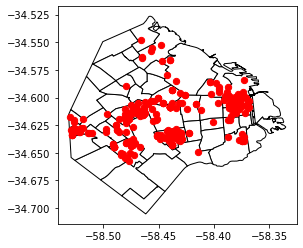

In [20]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
pol_barrios.plot(ax=ax, color='white', edgecolor='black')
geo_sin_barrio.plot(ax=ax, marker='o', color='red', markersize=40)
plt.show();

In [21]:
pol_barrios.columns

Index(['WKT', 'barrio', 'comuna', 'perimetro', 'area', 'geometry'], dtype='object')

In [22]:
geo_sin_barrio["new_place"] = geo_sin_barrio.geometry.apply(lambda x: pol_barrios[pol_barrios.contains(x)]["barrio"].iloc[0])
geo_sin_barrio.new_place.value_counts(dropna = False)

SAN NICOLAS          54
PARQUE CHACABUCO     39
CABALLITO            29
PARQUE AVELLANEDA    26
VERSALLES            21
VILLA SANTA RITA     15
VILLA GRAL. MITRE    15
VILLA CRESPO         13
MONSERRAT            11
RECOLETA              9
RETIRO                8
BARRACAS              7
ALMAGRO               6
FLORESTA              5
VELEZ SARSFIELD       5
BELGRANO              5
FLORES                4
PALERMO               4
VILLA LURO            3
VILLA REAL            3
BOEDO                 2
CONSTITUCION          2
BALVANERA             2
SAN CRISTOBAL         1
PARQUE CHAS           1
MONTE CASTRO          1
NUEVA POMPEYA         1
VILLA DEVOTO          1
NUÃEZ                1
COLEGIALES            1
Name: new_place, dtype: int64

In [23]:
barrios_nuevos = pd.DataFrame(geo_sin_barrio)
type(barrios_nuevos)

pandas.core.frame.DataFrame

In [24]:
barrios_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 610 to 82571
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Tipo_Propiedad         295 non-null    object  
 1   Región                 295 non-null    object  
 2   lat-lon                295 non-null    object  
 3   lat                    295 non-null    float64 
 4   lon                    295 non-null    float64 
 5   Precio                 295 non-null    float64 
 6   surface_total_in_m2    295 non-null    float64 
 7   surface_covered_in_m2  295 non-null    float64 
 8   Descripción            295 non-null    object  
 9   Título                 295 non-null    object  
 10  Precio_por_m2          295 non-null    float64 
 11  Garage                 295 non-null    int64   
 12  Estado                 295 non-null    int64   
 13  Pileta                 295 non-null    int64   
 14  Balcon                 295 non-null   

In [25]:
barrios_nuevos = barrios_nuevos.drop(columns = "geometry")
barrios_nuevos = barrios_nuevos.drop(columns = "Barrio")

In [26]:
barrios_nuevos.rename(columns={'new_place':'Barrio'},inplace=True)

In [27]:
barrios_nuevos.shape

(295, 23)

In [28]:
data.shape

(82627, 23)

In [29]:
data = data.replace({"Barrio":{"Capital Federal": np.NaN}})
data.Barrio.isnull().sum()

810

In [30]:
data = data.dropna(subset=['Barrio'], axis = 0) 
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81817 entries, 0 to 82625
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo_Propiedad         81817 non-null  object 
 1   Región                 81817 non-null  object 
 2   lat-lon                48682 non-null  object 
 3   lat                    48682 non-null  float64
 4   lon                    48682 non-null  float64
 5   Precio                 81817 non-null  float64
 6   surface_total_in_m2    81817 non-null  float64
 7   surface_covered_in_m2  81817 non-null  float64
 8   Descripción            81816 non-null  object 
 9   Título                 81817 non-null  object 
 10  Precio_por_m2          81817 non-null  float64
 11  Garage                 81817 non-null  int64  
 12  Estado                 81817 non-null  int64  
 13  Pileta                 81817 non-null  int64  
 14  Balcon                 81817 non-null  int64  
 15  Gi

(81817, 23)

In [31]:
data = pd.concat([data, barrios_nuevos], axis=0)

In [32]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82112 entries, 0 to 82571
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo_Propiedad         82112 non-null  object 
 1   Región                 82112 non-null  object 
 2   lat-lon                48977 non-null  object 
 3   lat                    48977 non-null  float64
 4   lon                    48977 non-null  float64
 5   Precio                 82112 non-null  float64
 6   surface_total_in_m2    82112 non-null  float64
 7   surface_covered_in_m2  82112 non-null  float64
 8   Descripción            82111 non-null  object 
 9   Título                 82112 non-null  object 
 10  Precio_por_m2          82112 non-null  float64
 11  Garage                 82112 non-null  int64  
 12  Estado                 82112 non-null  int64  
 13  Pileta                 82112 non-null  int64  
 14  Balcon                 82112 non-null  int64  
 15  Gi

(82112, 23)

In [33]:
data.Barrio.value_counts()

Mar del Plata                 4990
Córdoba                       4513
Rosario                       4047
Tigre                         2914
Palermo                       2706
                              ... 
Barrio Cerrado La Masia          1
Paso de los Libres               1
Barrio Cerrado "La Chacra"       1
Etcheverry                       1
Ramallo                          1
Name: Barrio, Length: 894, dtype: int64

In [34]:
#Tenemos 72 Barrios en CABA según el DF Nuestro
barrios_caba = data[data.Región=="Capital Federal"].Barrio.unique()
barrios_caba.shape

(78,)

In [35]:
#Son 49 los barrios realmente
barrios_delitos = data_delitos.barrio.unique()
print(barrios_delitos.shape)
print(barrios_delitos)

(49,)
['Caballito' 'Balvanera' 'Monserrat' 'Villa Gral. Mitre' 'Villa Crespo'
 'Villa Devoto' 'Almagro' 'Paternal' 'Villa del Parque' 'Recoleta'
 'Chacarita' 'Palermo' 'Retiro' 'San Nicolás' 'Villa Ortuzar' 'Colegiales'
 'Villa Urquiza' 'Belgrano' 'Nuñez' 'Saavedra' 'Villa Lugano'
 'Villa Soldati' 'Parque Avellaneda' 'Barracas' 'Mataderos'
 'Nueva Pompeya' 'Flores' 'Parque Patricios' 'Boca' 'Parque Chacabuco'
 'Liniers' 'Boedo' 'Floresta' 'Vélez Sársfield' 'Monte Castro' 'San Telmo'
 'Villa Santa Rita' 'San Cristóbal' 'Parque Chas' 'Villa Riachuelo'
 'Villa Luro' 'Villa Pueyrredón' 'Coghlan' 'Villa Real' 'Versalles'
 'Puerto Madero' nan 'Constitución' 'Agronomía']


In [36]:
todos_barrios_lista = barrios_caba.tolist() + barrios_delitos.tolist()
df_todos_barrios = pd.DataFrame(todos_barrios_lista)
df_todos_barrios.value_counts()

Parque Avellaneda    2
Nueva Pompeya        2
Palermo              2
Agronomía            2
Parque Chacabuco     2
                    ..
SAN NICOLAS          1
NUEVA POMPEYA        1
VELEZ SARSFIELD      1
VERSALLES            1
ALMAGRO              1
Length: 78, dtype: int64

In [37]:
def no_duplicados (data_uno, data_dos):
    result = []
    for x in data_uno:
        if x not in data_dos:
            result += [x]
    return(result)

In [38]:
barrios_extra = no_duplicados(barrios_caba, barrios_delitos)
barrios_extra.sort()
print(barrios_extra)

['ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO', 'BOEDO', 'CABALLITO', 'COLEGIALES', 'CONSTITUCION', 'FLORES', 'FLORESTA', 'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUÃ\x91EZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'RECOLETA', 'RETIRO', 'SAN CRISTOBAL', 'SAN NICOLAS', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LURO', 'VILLA REAL', 'VILLA SANTA RITA']


In [39]:
diccionario = {"ALMAGRO": "Almagro", "BALVANERA":"Balvanera", "BARRACAS": "Barracas", "BOEDO":"Boedo", "BELGRANO":"Belgrano",\
               "CABALLITO":"Caballito","COLEGIALES": "Colegiales", "CONSTITUCION":"Constitución", "FLORES":"Flores",\
               "FLORESTA":"Floresta", "MONSERRAT":"Monserrat", "MONTE CASTRO":"Monte Castro",\
               "NUEVA POMPEYA": "Nueva Pompeya", "NUÃ\x91EZ":"Nuñez", "PALERMO":"Palermo",\
              "PARQUE AVELLANEDA": "Parque Avellaneda", "PARQUE CHACABUCO":"Parque Chacabuco", "PARQUE CHAS":"Parque Chas",\
               "RECOLETA":"Recoleta", "RETIRO":"Retiro", "SAN CRISTOBAL":"San Cristóbal", "SAN NICOLAS":"San Nicolás",\
               "VELEZ SARSFIELD":"Vélez Sársfield", "VERSALLES":"Versalles", "VILLA CRESPO":"Villa Crespo", "VILLA DEVOTO":"Villa Devoto",\
              "VILLA GRAL. MITRE":"Villa Gral. Mitre", "VILLA LURO":"Villa Luro", "VILLA REAL":"Villa Real", "VILLA SANTA RITA":"Villa Santa Rita"}

In [40]:
#data_dos = data
#data_dos["new_place"] = data_dos.Barrio.map(lambda x: diccionario[x] if x in diccionario.keys() else x)
data["new_place"] = data.Barrio.map(lambda x: diccionario[x] if x in diccionario.keys() else x)

In [41]:
mask_dos = data.Región == "Capital Federal"
data[mask_dos][["Barrio", "new_place"]].sample(35)

,Barrio,new_place
50852,Villa Crespo,Villa Crespo
24101,Recoleta,Recoleta
27147,Colegiales,Colegiales
80306,San Nicolás,San Nicolás
66382,Caballito,Caballito
71773,Mataderos,Mataderos
17885,Boedo,Boedo
24464,Belgrano,Belgrano
50990,Villa Devoto,Villa Devoto
36580,Villa Urquiza,Villa Urquiza


In [42]:
# borrar Columna Barrio y poner "New_place" renombrarla como Barrio
data.drop(["Barrio"], axis=1, inplace = True)

data.rename(columns={'new_place':'Barrio'},inplace=True)

In [43]:
#Son 48 barrios en CABA
data_caba_mask = data.Región == "Capital Federal"
data_caba = data[data_caba_mask]
barrios_caba = data_caba.Barrio.unique()
barrios_caba.shape

(48,)

In [44]:
data.shape

(82112, 23)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82112 entries, 0 to 82571
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo_Propiedad         82112 non-null  object 
 1   Región                 82112 non-null  object 
 2   lat-lon                48977 non-null  object 
 3   lat                    48977 non-null  float64
 4   lon                    48977 non-null  float64
 5   Precio                 82112 non-null  float64
 6   surface_total_in_m2    82112 non-null  float64
 7   surface_covered_in_m2  82112 non-null  float64
 8   Descripción            82111 non-null  object 
 9   Título                 82112 non-null  object 
 10  Precio_por_m2          82112 non-null  float64
 11  Garage                 82112 non-null  int64  
 12  Estado                 82112 non-null  int64  
 13  Pileta                 82112 non-null  int64  
 14  Balcon                 82112 non-null  int64  
 15  Gi

In [46]:
data.to_csv('./data/properati-fase2Geo.csv', sep=',', index=False)